In [1]:
!pip install matplotlib

In [2]:
import requests
import pandas as pd
import matplotlib as mpl

Happy Harvest Coffee is a company that grows the arabica coffee plant, harvests and sells the unpocessed beans.

We consider ourselfes as a true Southern American company, therefore we want to produce a Latin American product. Therefore, we decided to pick the three cities with the highest renown for their coffee (https://southamericabackpacker.com/coffee-south-america/). After evaluating the provided information, we chose to go with Armenia and Belo Horizonte. Belo Horizonte as a common coffee harvest place is far away from the coast which will complicate shipping in future, therefore we have added Pocos de Caldas to the sample which is close to Sao Paulo. The final sample consists of Armenia, Pocos de Caldas and Belo Horizonte.

The optimal conditions for growing ARABICA coffee can be reviewed here (https://www.researchgate.net/figure/Some-favorable-conditions-of-Arabica-and-Robusta-coffee-plants_tbl1_357708107) 

We chose our farming spot after three constrictions (temperature, rainfall and wind). The upper boundry for the wind speed is set as the moderate wind.

In [3]:
#weather restrictions on wind
import wikipedia
table=pd.read_html('https://en.wikipedia.org/wiki/Beaufort_scale',match='Description')
tables=table[0]
tables.iloc[4]

#according to the website strong winds should be avoided (https://openknowledge.fao.org/server/api/core/bitstreams/f0230fae-897f-4a7e-9069-36a7e99b1924/content)
#therefore we have decided that the upper bound of the wind shall be the upper bound of the moderate wind according to the Beaufort scale; 
# which is 7.9m/s 

Beaufort number                                                            4
Description                                                  Moderate breeze
Wind speed                      11–16 knots 13–18 mph 20–28 km/h 5.5–7.9 m/s
Wave height                                                   3.5–6 ft 1–2 m
Sea conditions             Small waves becoming longer; fairly frequent w...
Land conditions            Raises dust and loose paper; small branches moved
Sea conditions (photo)                                                   NaN
Associated warning flag                                                  NaN
Name: 4, dtype: object

Import information from weather API

FOR ARMENIA(COLOMBIA)

In [4]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = "8cd9770d46msh2bda7a77ebe30d6p10b83fjsnb5061a8acbd1"

In [5]:
# Define your parameters as a dictionary
params = {
    "lat": "4.32200",  #  Armenia's latitude 
    "lon": "-75.4052",  # Armenia's longitude
    "start": "2023-01-01",  
    "end": "2023-12-31"  
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                       params=params,
                       headers={
                           "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key # Add the private_api_key variable 
                       })

In [6]:
data=response.json()

In [7]:
df_armenia=pd.DataFrame(data["data"])

In [8]:
df_armenia

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-01-01,23.1,19.1,26.0,0.3,NaN,2.0,6.1,None,1017.2,None
1,2023-01-02,23.7,18.4,26.9,4.1,NaN,326.0,5.7,None,1017.1,None
2,2023-01-03,22.8,19.0,27.2,0.3,10.0,335.0,6.6,None,1017.8,None
3,2023-01-04,22.4,18.8,26.0,4.1,10.0,25.0,7.2,None,1017.2,None
4,2023-01-05,23.8,18.8,27.0,0.5,NaN,351.0,4.2,None,1016.9,None
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,23.3,19.7,27.0,0.9,NaN,29.0,6.3,None,1016.7,None
361,2023-12-28,23.7,20.3,28.4,1.0,NaN,185.0,9.2,None,1017.1,None
362,2023-12-29,24.2,18.4,30.2,0.0,NaN,59.0,7.4,None,1018.1,None
363,2023-12-30,24.1,19.8,28.2,0.0,NaN,34.0,9.4,None,1018.5,None


In [9]:
df_armenia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    45 non-null     float64
 6   wdir    365 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    0 non-null      object 
 9   pres    365 non-null    float64
 10  tsun    0 non-null      object 
dtypes: float64(8), object(3)
memory usage: 31.5+ KB


In [10]:
df_armenia.drop(columns=["snow", "wpgt", "tsun"],inplace=True) # dropipping all the columns with 0 nonnull

In [11]:
df_armenia

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,23.1,19.1,26.0,0.3,2.0,6.1,1017.2
1,2023-01-02,23.7,18.4,26.9,4.1,326.0,5.7,1017.1
2,2023-01-03,22.8,19.0,27.2,0.3,335.0,6.6,1017.8
3,2023-01-04,22.4,18.8,26.0,4.1,25.0,7.2,1017.2
4,2023-01-05,23.8,18.8,27.0,0.5,351.0,4.2,1016.9
...,...,...,...,...,...,...,...,...
360,2023-12-27,23.3,19.7,27.0,0.9,29.0,6.3,1016.7
361,2023-12-28,23.7,20.3,28.4,1.0,185.0,9.2,1017.1
362,2023-12-29,24.2,18.4,30.2,0.0,59.0,7.4,1018.1
363,2023-12-30,24.1,19.8,28.2,0.0,34.0,9.4,1018.5


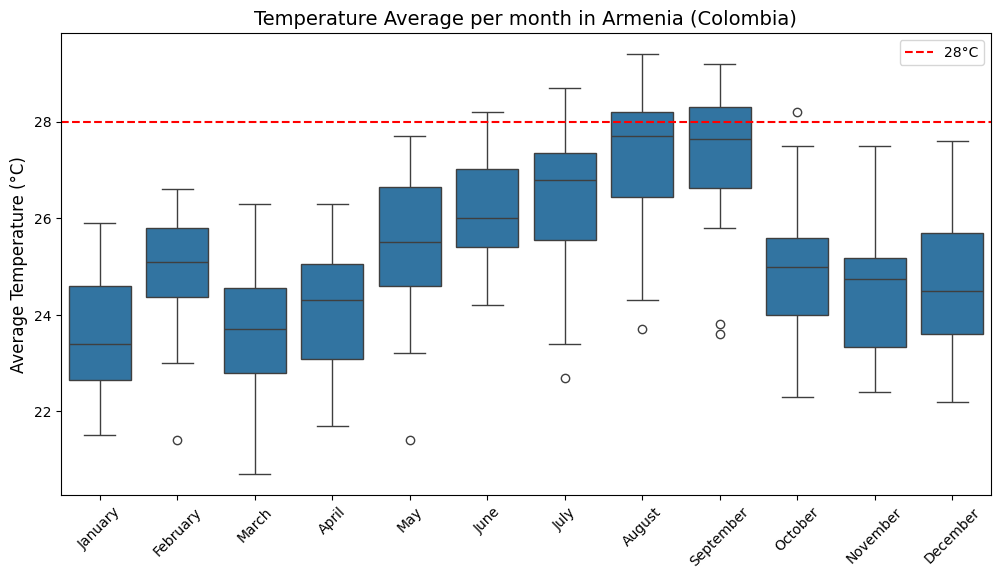

In [12]:
# boxplot of the temperature average per season for Armenia (Colombia)

import pandas as pd
df_armenia['date'] = pd.to_datetime(df_armenia['date'], errors='coerce')
df_armenia['month'] = df_armenia['date'].dt.month_name()

import seaborn as sns
import matplotlib.pyplot as plt

# boxplot of temperature averages grouped by month

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_armenia, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per month in Armenia (Colombia)',fontsize=14)
plt.xlabel('')
plt.ylabel('Average Temperature (°C)',fontsize=12)
plt.xticks(rotation=45)

# cutoff lines showing over 24 degrees not optimal (under 18 not optimal but not in dataset)

plt.axhline(y=28, color='red', linestyle='--', label='28°C')
plt.legend()
plt.show()

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/3579385554.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


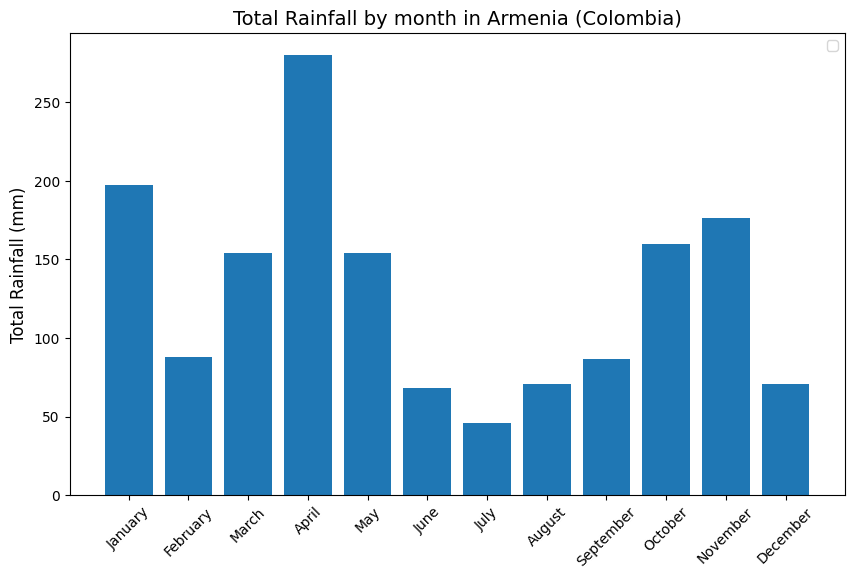

In [13]:
# grouping by months and sorting the months in calender order
monthly_rainfall = df_armenia.groupby('month')['prcp'].sum().reset_index()
monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'])
plt.title('Total Rainfall by month in Armenia (Colombia)', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45) 
plt.legend()
plt.show()

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/3889084494.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], categories=pd.date_range("2024-01-01", periods=12, freq='M').strftime('%B'), ordered=True)


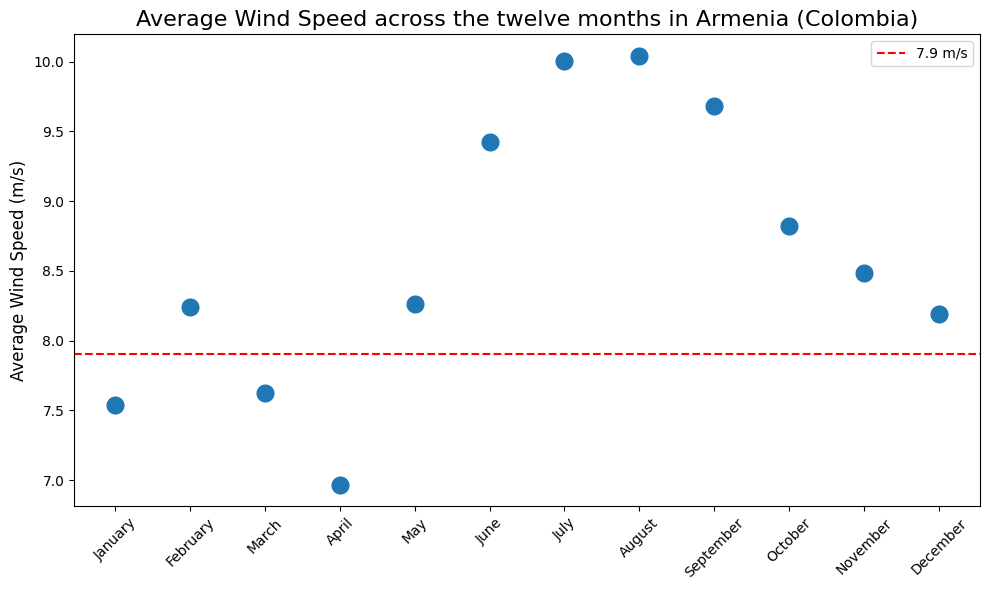

In [14]:
# grouping by months and sorting the months in calender order
monthly_avg_wspd = df_armenia.groupby('month')['wspd'].mean().reset_index()
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], categories=pd.date_range("2024-01-01", periods=12, freq='M').strftime('%B'), ordered=True)
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')


plt.figure(figsize=(10, 6))

# scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200, marker='o')


plt.title('Average Wind Speed across the twelve months in Armenia (Colombia)', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# cutoff horizontal line at 7.9 m/s (maximum of the wanted wind speed range)
plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')
plt.legend()


plt.tight_layout()
plt.show()

In [15]:
#FOR POÇOS DE CALDAS (BRAZIL)

In [16]:
private_api_key_1 = "8cd9770d46msh2bda7a77ebe30d6p10b83fjsnb5061a8acbd1"

response_1 = requests.get("https://commodities-apised.p.rapidapi.com/v1/supported",
                       headers={
                           "x-rapidapi-host": "x-rapidapi-host: meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key_1 # Add the private_api_key variable
                       })

In [17]:
print(response_1)

<Response [404]>


In [18]:
import requests
import pandas as pd
import matplotlib as mpl

In [19]:
import requests

In [20]:
response = requests.get("https://randomuser.me/api/")

In [21]:
print(response.status_code)

200


In [22]:
response.json()

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Jeremy', 'last': 'French'},
   'location': {'street': {'number': 5443, 'name': 'Peel St'},
    'city': 'Trenton',
    'state': 'Yukon',
    'country': 'Canada',
    'postcode': 'S7H 5Q4',
    'coordinates': {'latitude': '-66.1924', 'longitude': '-105.9749'},
    'timezone': {'offset': '+5:45', 'description': 'Kathmandu'}},
   'email': 'jeremy.french@example.com',
   'login': {'uuid': '74b8befd-ed25-45e7-87d6-79194c2bc611',
    'username': 'ticklishgoose544',
    'password': 'jimbob',
    'salt': '51ivt4BU',
    'md5': '7cd1138ffe597fb6d7f7840824d0b5cc',
    'sha1': '1eea3c20c61fdd0d69b4d3a7f491bd8b41b6ff9d',
    'sha256': 'd54f047f0e4cd67326fdd470e7877edf92bc3798b69b20dfea33eb39700de979'},
   'dob': {'date': '1978-01-07T02:40:35.956Z', 'age': 46},
   'registered': {'date': '2003-08-23T04:15:15.735Z', 'age': 21},
   'phone': 'H81 T83-0031',
   'cell': 'M90 C57-1692',
   'id': {'name': 'SIN', 'value': '033716648'},
   '

In [23]:
private_api_key = "dfdd251ecbmshf1b35f78d2c4d46p164064jsn30c557b5eacc"

In [24]:
# Weather Data Poços de Caldas(Brazil)
params = {
  "lat": "-21.7872",  # Poços de Caldas' latitude
    "lon": "-46.5616",  # Poços de Caldas' longitude
    "start": "2023-01-01",  # Today's date
    "end": "2023-12-31"  # 1 year later
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                       params=params,
                       headers={
                           "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key # Add the private_api_key variable 
                       })

In [25]:
print(response.json())

{'meta': {'generated': '2024-10-23 07:40:11', 'stations': ['86846', '83681', '83683', '83033']}, 'data': [{'date': '2023-01-01', 'tavg': 19.9, 'tmin': 16.7, 'tmax': 25.0, 'prcp': 5.2, 'snow': None, 'wdir': 16.0, 'wspd': 1.9, 'wpgt': None, 'pres': 1024.3, 'tsun': None}, {'date': '2023-01-02', 'tavg': 19.8, 'tmin': 16.6, 'tmax': 23.5, 'prcp': 8.4, 'snow': None, 'wdir': 39.0, 'wspd': 4.6, 'wpgt': None, 'pres': 1021.8, 'tsun': None}, {'date': '2023-01-03', 'tavg': 19.2, 'tmin': 17.7, 'tmax': 22.0, 'prcp': 13.6, 'snow': None, 'wdir': 358.0, 'wspd': 1.6, 'wpgt': None, 'pres': 1021.0, 'tsun': None}, {'date': '2023-01-04', 'tavg': 20.0, 'tmin': 17.5, 'tmax': 23.7, 'prcp': 12.9, 'snow': None, 'wdir': 350.0, 'wspd': 4.2, 'wpgt': None, 'pres': 1019.0, 'tsun': None}, {'date': '2023-01-05', 'tavg': 19.6, 'tmin': 17.5, 'tmax': 23.1, 'prcp': 26.5, 'snow': None, 'wdir': 27.0, 'wspd': 4.8, 'wpgt': None, 'pres': 1020.1, 'tsun': None}, {'date': '2023-01-06', 'tavg': 17.9, 'tmin': 15.7, 'tmax': 20.2, 'prc

In [26]:
import json
PDC = response.json() #PDC is Poços de Caldas
#print(json.dumps(PDC, indent=4))

In [27]:
PDC = response.json()

# creating dataFrame from the JSON data
df_PDC = pd.DataFrame(PDC["data"])


print(df_PDC)

           date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2023-01-01  19.9  16.7  25.0   5.2  None   16.0   1.9  None  1024.3  None
1    2023-01-02  19.8  16.6  23.5   8.4  None   39.0   4.6  None  1021.8  None
2    2023-01-03  19.2  17.7  22.0  13.6  None  358.0   1.6  None  1021.0  None
3    2023-01-04  20.0  17.5  23.7  12.9  None  350.0   4.2  None  1019.0  None
4    2023-01-05  19.6  17.5  23.1  26.5  None   27.0   4.8  None  1020.1  None
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
360  2023-12-27  22.9  18.2  28.6   0.7  None   44.0   2.8  None  1014.0  None
361  2023-12-28  22.0  18.0  29.2   0.0  None   37.0   3.2  None  1014.8  None
362  2023-12-29  23.6  15.5  31.2   0.0  None  328.0   3.3  None  1012.5  None
363  2023-12-30  22.6  16.2  29.2   3.6  None  189.0   4.1  None  1013.0  None
364  2023-12-31  21.1  17.6  25.6   3.2  None   45.0   3.9  None  1014.4  None

[365 rows x 11 columns]


In [28]:
df_PDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    0 non-null      object 
 6   wdir    365 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    0 non-null      object 
 9   pres    365 non-null    float64
 10  tsun    0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 31.5+ KB


In [29]:
df_PDC.drop(columns=["snow", "wpgt", "tsun"]) #dropping all the columns with 0 non-null

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,19.9,16.7,25.0,5.2,16.0,1.9,1024.3
1,2023-01-02,19.8,16.6,23.5,8.4,39.0,4.6,1021.8
2,2023-01-03,19.2,17.7,22.0,13.6,358.0,1.6,1021.0
3,2023-01-04,20.0,17.5,23.7,12.9,350.0,4.2,1019.0
4,2023-01-05,19.6,17.5,23.1,26.5,27.0,4.8,1020.1
...,...,...,...,...,...,...,...,...
360,2023-12-27,22.9,18.2,28.6,0.7,44.0,2.8,1014.0
361,2023-12-28,22.0,18.0,29.2,0.0,37.0,3.2,1014.8
362,2023-12-29,23.6,15.5,31.2,0.0,328.0,3.3,1012.5
363,2023-12-30,22.6,16.2,29.2,3.6,189.0,4.1,1013.0


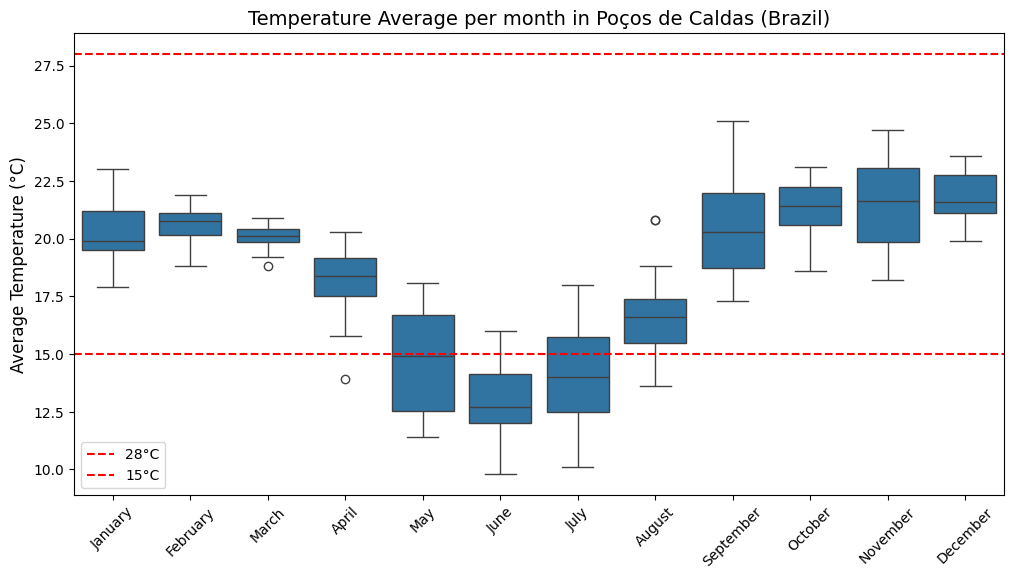

In [30]:
# converting date column
df_PDC['date'] = pd.to_datetime(df_PDC['date'])

df_PDC['month'] = df_PDC['date'].dt.month_name()

# boxplot of temperature averages grouped by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_PDC, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per month in Poços de Caldas (Brazil)',fontsize=14)
plt.xlabel('')
plt.ylabel('Average Temperature (°C)',fontsize=12)
plt.xticks(rotation=45)

# cutoff lines showing range 24 and 18 degrees 
plt.axhline(y=28, color='red', linestyle='--', label='28°C')
plt.axhline(y=15, color='red', linestyle='--', label='15°C')
plt.legend()

plt.show()

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/3959657562.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


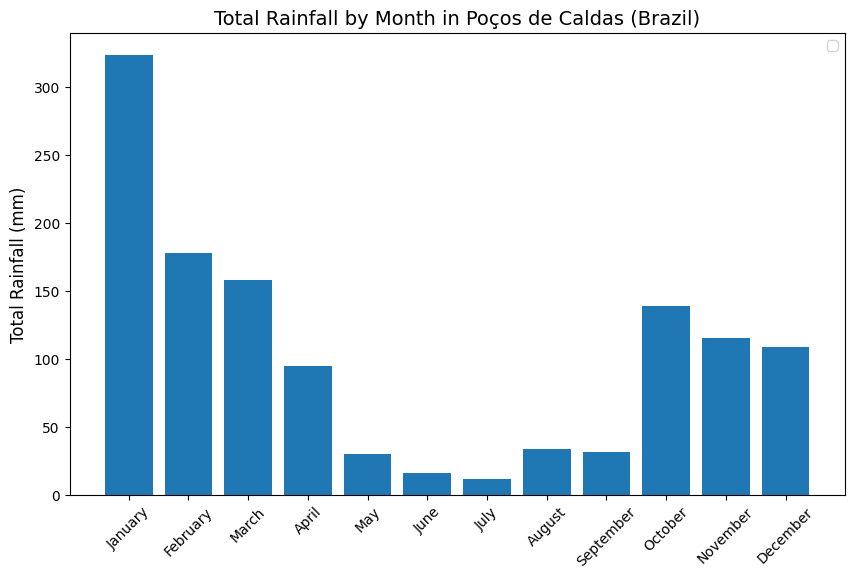

In [31]:
# grouping by months and sorting the months in calender order
monthly_rainfall = df_PDC.groupby('month')['prcp'].sum().reset_index()

monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), 
                                             ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# bar chart for monthly rainfall
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'])
plt.title('Total Rainfall by Month in Poços de Caldas (Brazil)', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Rainfall (mm)', fontsize=12)  # Changed 'pcpt' to 'mm' for clarity
plt.xticks(rotation=45) 
plt.legend()
plt.show()

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/2875275314.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'),


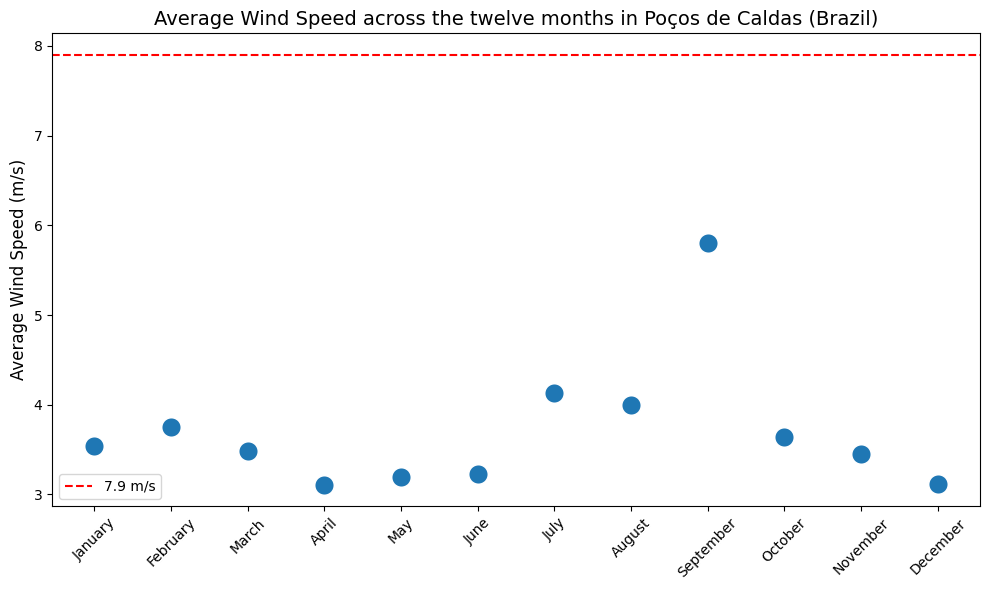

In [32]:
# grouping by months and sorting the months in calender order
monthly_avg_wspd = df_PDC.groupby('month')['wspd'].mean().reset_index()
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'), 
                                             ordered=True)
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')


plt.figure(figsize=(10, 6))

# scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200, marker='o')


plt.title('Average Wind Speed across the twelve months in Poços de Caldas (Brazil)', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# cutoff horizontal line at 7.9 m/s and 5.5 m/s

plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')


plt.legend()
plt.tight_layout()
plt.show()

In [33]:
#FOR  Belo Horizonte (Minas Gerais, Brazil)

In [34]:
private_api_key = "dfdd251ecbmshf1b35f78d2c4d46p164064jsn30c557b5eacc"

In [35]:
# Weather Data for Belo Horizonte, Minas Gerais, Brazil)
params = {
    "lat": "-19.9245",  # Belo Horizonte's latitude
    "lon": "-43.9345",  # Belo Horizonte's longitude
    "start": "2023-01-01",  # Start of the current year
    "end": "2023-12-31"  # End of the current year
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                         params=params,
                         headers={
                             "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                             "X-RapidAPI-Key": private_api_key  # Add the private_api_key variable 
                         })

In [36]:
print(response.json())

{'meta': {'generated': '2024-10-24 08:58:30', 'stations': ['83587', '86800', 'SBPR0', '83566']}, 'data': [{'date': '2023-01-01', 'tavg': 21.9, 'tmin': 20.0, 'tmax': 25.0, 'prcp': 6.9, 'snow': None, 'wdir': 43.0, 'wspd': 8.9, 'wpgt': None, 'pres': 1018.0, 'tsun': None}, {'date': '2023-01-02', 'tavg': 21.9, 'tmin': 18.8, 'tmax': 27.0, 'prcp': 13.9, 'snow': None, 'wdir': 81.0, 'wspd': 11.2, 'wpgt': None, 'pres': 1016.6, 'tsun': None}, {'date': '2023-01-03', 'tavg': 21.4, 'tmin': 19.1, 'tmax': 25.0, 'prcp': 16.8, 'snow': None, 'wdir': 3.0, 'wspd': 8.0, 'wpgt': None, 'pres': 1015.1, 'tsun': None}, {'date': '2023-01-04', 'tavg': 21.7, 'tmin': 19.0, 'tmax': 27.0, 'prcp': 13.1, 'snow': None, 'wdir': 302.0, 'wspd': 9.7, 'wpgt': None, 'pres': 1015.4, 'tsun': None}, {'date': '2023-01-05', 'tavg': 21.2, 'tmin': 18.0, 'tmax': 24.0, 'prcp': 18.1, 'snow': None, 'wdir': 353.0, 'wspd': 8.6, 'wpgt': None, 'pres': 1014.8, 'tsun': None}, {'date': '2023-01-06', 'tavg': 21.8, 'tmin': 19.2, 'tmax': 25.0, 'pr

In [37]:
import json
BH = response.json() #BH is Belo Horizonte
#print(json.dumps(BH, indent=4))

In [38]:
BH = response.json()

# create a DataFrame from the JSON data
df_BH = pd.DataFrame(BH["data"])


print(df_BH)

           date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2023-01-01  21.9  20.0  25.0   6.9  None   43.0   8.9  None  1018.0  None
1    2023-01-02  21.9  18.8  27.0  13.9  None   81.0  11.2  None  1016.6  None
2    2023-01-03  21.4  19.1  25.0  16.8  None    3.0   8.0  None  1015.1  None
3    2023-01-04  21.7  19.0  27.0  13.1  None  302.0   9.7  None  1015.4  None
4    2023-01-05  21.2  18.0  24.0  18.1  None  353.0   8.6  None  1014.8  None
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
360  2023-12-27  23.9  20.0  30.0  34.3  None  117.0  12.3  None  1016.6  None
361  2023-12-28  24.5  21.0  29.0   0.7  None   88.0  11.5  None  1017.5  None
362  2023-12-29  26.7  21.0  34.0   0.2  None   76.0   9.5  None  1015.7  None
363  2023-12-30  23.8  20.0  28.0  10.0  None   37.0  11.5  None  1015.2  None
364  2023-12-31  24.3  21.0  28.0  21.6  None   74.0  15.2  None  1016.0  None

[365 rows x 11 columns]


In [39]:
df_BH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    0 non-null      object 
 6   wdir    365 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    0 non-null      object 
 9   pres    365 non-null    float64
 10  tsun    0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 31.5+ KB


In [40]:
df_BH.drop(columns=["snow", "wpgt", "tsun"]) # dropping all the 0 non-null columns

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,21.9,20.0,25.0,6.9,43.0,8.9,1018.0
1,2023-01-02,21.9,18.8,27.0,13.9,81.0,11.2,1016.6
2,2023-01-03,21.4,19.1,25.0,16.8,3.0,8.0,1015.1
3,2023-01-04,21.7,19.0,27.0,13.1,302.0,9.7,1015.4
4,2023-01-05,21.2,18.0,24.0,18.1,353.0,8.6,1014.8
...,...,...,...,...,...,...,...,...
360,2023-12-27,23.9,20.0,30.0,34.3,117.0,12.3,1016.6
361,2023-12-28,24.5,21.0,29.0,0.7,88.0,11.5,1017.5
362,2023-12-29,26.7,21.0,34.0,0.2,76.0,9.5,1015.7
363,2023-12-30,23.8,20.0,28.0,10.0,37.0,11.5,1015.2


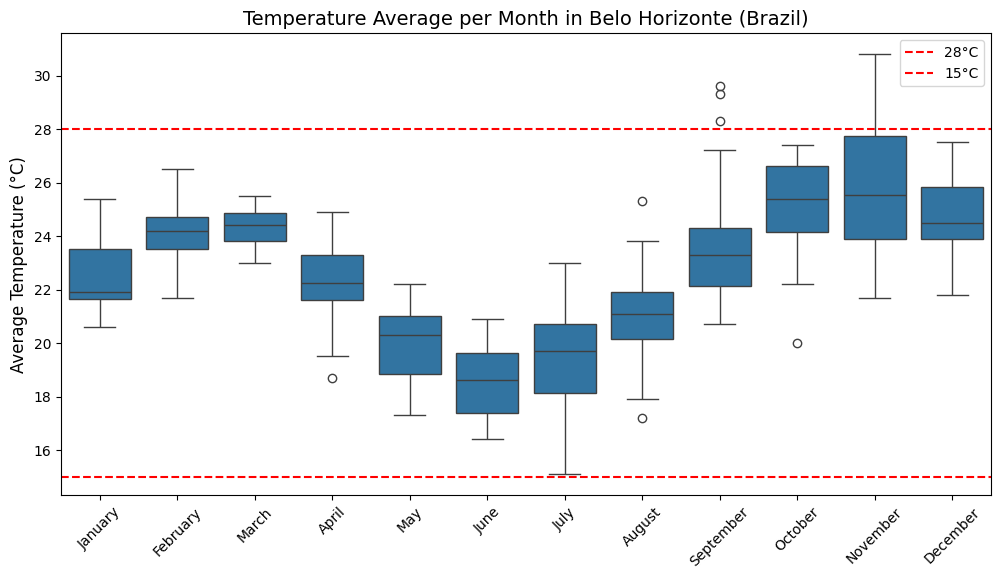

In [41]:
df_BH['date'] = pd.to_datetime(df_BH['date'])

df_BH['month'] = df_BH['date'].dt.month_name()

# boxplot of temperature averages grouped by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_BH, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per Month in Belo Horizonte (Brazil)',fontsize=14)
plt.xlabel('')
plt.ylabel('Average Temperature (°C)',fontsize=12)
plt.xticks(rotation=45)

# cutoff lines showing between 18 and 24 degrees
plt.axhline(y=28, color='red', linestyle='--', label='28°C')
plt.axhline(y=15, color='red', linestyle='--', label='15°C')
plt.legend()
plt.show()

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/190367496.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


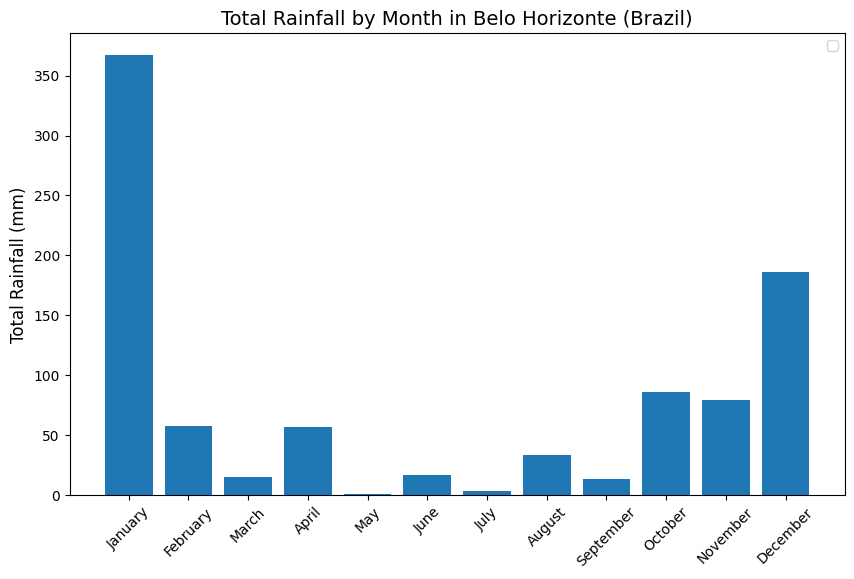

In [42]:
# grouping by months and sorting the months in calender order
monthly_rainfall = df_BH.groupby('month')['prcp'].sum().reset_index()

monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), 
                                             ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# bar chart for total rainfall
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'])
plt.title('Total Rainfall by Month in Belo Horizonte (Brazil)', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Rainfall (mm)', fontsize=12)  # Changed 'pcpt' to 'mm' for clarity
plt.xticks(rotation=45) 
plt.legend()
plt.show()

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/4292390024.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'),


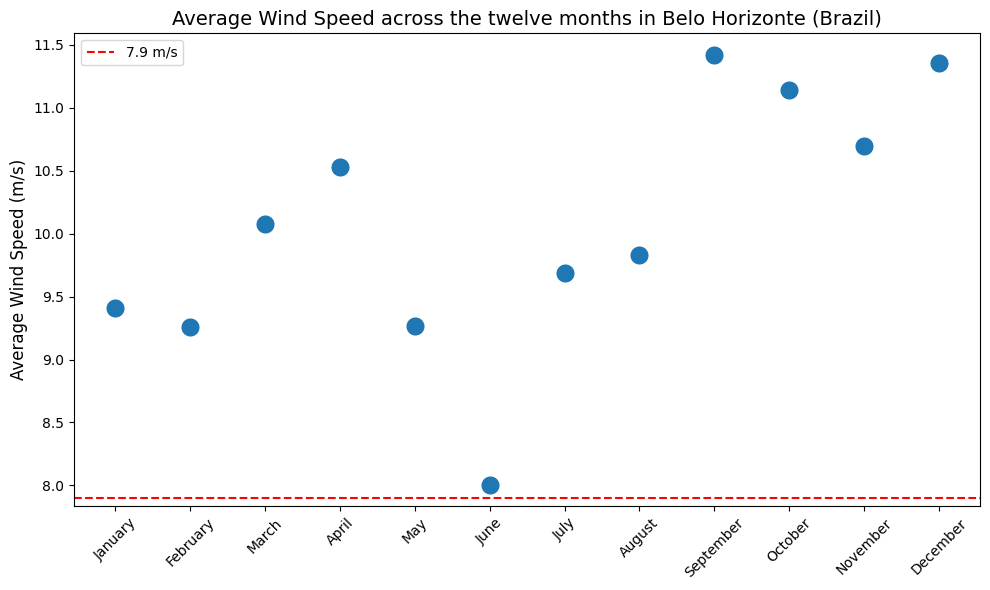

In [43]:
# grouping by months and sorting the months in calender order
monthly_avg_wspd = df_BH.groupby('month')['wspd'].mean().reset_index()
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], 
                                             categories=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'), 
                                             ordered=True)
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')


plt.figure(figsize=(10, 6))

# scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200,marker='o')


plt.title('Average Wind Speed across the twelve months in Belo Horizonte (Brazil)', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# cutoff horizontal line at 7.9 m/s (5.5 is not included as it is not in data set)
plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')
plt.legend()
plt.tight_layout()
plt.show()

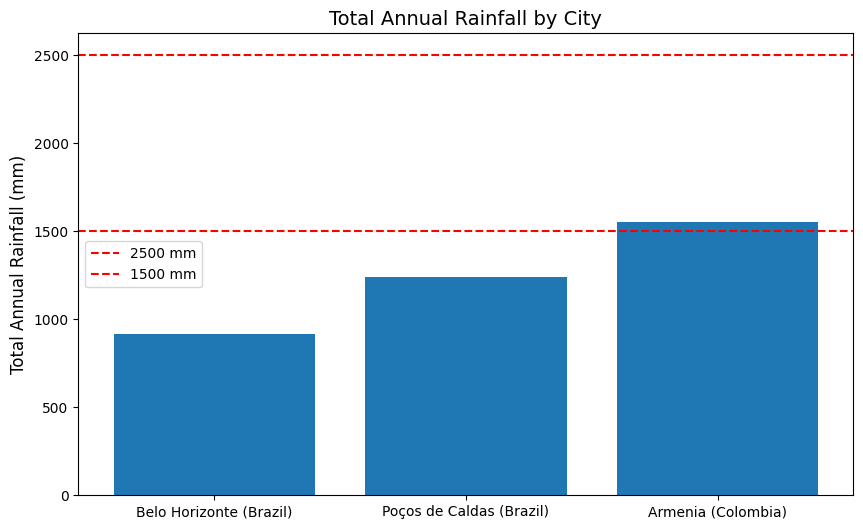

In [44]:
# total annual rainfall for each region
annual_rainfall_BH = df_BH['prcp'].sum()
annual_rainfall_PDC = df_PDC['prcp'].sum()
annual_rainfall_Armenia = df_armenia['prcp'].sum()


annual_rainfall = pd.DataFrame({
    'Region': ['Belo Horizonte (Brazil)', 'Poços de Caldas (Brazil)', 'Armenia (Colombia)'],
    'Total Rainfall (mm)': [annual_rainfall_BH, annual_rainfall_PDC, annual_rainfall_Armenia]
})


plt.figure(figsize=(10, 6))
plt.bar(annual_rainfall['Region'], annual_rainfall['Total Rainfall (mm)'])
plt.title('Total Annual Rainfall by City', fontsize=14)

plt.ylabel('Total Annual Rainfall (mm)', fontsize=12)

# cutoff lines for reference
plt.axhline(y=2500, color='red', linestyle='--', label='2500 mm')
plt.axhline(y=1500, color='red', linestyle='--', label='1500 mm')

plt.legend()
plt.show()

## COFFEE PRICES

### Creating a data frame that shows coffee prices from APIs ( https://rapidapi.com/apised-apised-default/api/commodities-apised/playground/apiendpoint_840153c6-2433-44db-b849-31d7a406f67c ) in EUR currency from 2024-07-24 to 2024-09-06.


Each API call only extracts the day and coffee prices for on date. Hash symbols (#) have been added before code execution to prevent system overload during runtime and have also been placed before DataFrame saving operations to avoid unintended DataFrame modifications. The resulting DataFrame, containing coffee price data from 2024-07-24 to 2024-09-06, has been saved in the file df_commodity_coffee_priceEUR.csv which stores all the extracted coffee prices in EUR currency.

In [45]:
import http.client
import json
import pandas as pd
import time

In [46]:
def fetch_commodity_data(dates, base="EUR", symbols="COFFEE"):
    """
    Fetch commodity data for multiple dates and return as a DataFrame
    
    Returns:
    pandas.DataFrame: Combined data for all dates
    """

    all_data = []
    
    conn = http.client.HTTPSConnection("commodity-rates-api.p.rapidapi.com")
    headers = {
        'x-rapidapi-key': "ee6cdd8a4dmsh63a9d7133a022c3p182506jsn54b9ce17f4d9",
        'x-rapidapi-host': "commodity-rates-api.p.rapidapi.com"
    }
    
    for date in dates:
        try:
            # Construct the endpoint
            endpoint = f"/open-high-low-close/{date}?base={base}&symbols={symbols}"
            conn.request("GET", endpoint, headers=headers)
            response = conn.getresponse()
            data = response.read()
            json_data = json.loads(data.decode('utf-8'))
            
            # Extract the relevant data
            if json_data.get('success') and 'rates' in json_data:
                row_data = {
                    'date': json_data['date'],
                    'timestamp': json_data['timestamp'],
                    'base': json_data['base'],
                    'symbol': json_data['symbol'],
                    'unit': json_data['unit'],
                    'open': json_data['rates']['open'],
                    'high': json_data['rates']['high'],
                    'low': json_data['rates']['low'],
                    'close': json_data['rates']['close']
                }
                all_data.append(row_data)
            
            # Add a small delay to avoid hitting rate limits
            time.sleep(1)
            
        except Exception as e:
            print(f"Error fetching data for date {date}: {str(e)}")
            continue
    
    conn.close()
    
    
    if all_data:
        df = pd.DataFrame(all_data)
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        
        cols = ['date', 'timestamp', 'base', 'symbol', 'unit', 'open', 'high', 'low', 'close']
        df = df[cols]
        
        return df
    else:
        return pd.DataFrame()





#dates = ["2024-07-24", "2024-07-25", "2024-07-26", "2024-07-27", "2024-07-28", "2024-07-29", "2024-07-30", "2024-07-31", "2024-08-01", "2024-08-02", "2024-08-03", "2024-08-04", "2024-08-05", "2024-08-06", "2024-08-07", "2024-08-08", "2024-08-09", "2024-08-10", "2024-08-11", "2024-08-12", "2024-08-13", "2024-08-14", "2024-08-15", "2024-08-16", "2024-08-17", "2024-08-18", "2024-08-19", "2024-08-20", "2024-08-21", "2024-08-22", "2024-08-23", "2024-08-24", "2024-08-25", "2024-08-26", "2024-08-27", "2024-08-28", "2024-08-29", "2024-08-30", "2024-08-31", "2024-09-01", "2024-09-02", "2024-09-03", "2024-09-04", "2024-09-05", "2024-09-06"]

#df = fetch_commodity_data(dates)

#print(df.head())

In [47]:
#df

In [48]:
#df.to_csv("./df_commodity_coffee_priceEUR.csv", index=False)

In [49]:
df_coffee = pd.read_csv('./df_commodity_coffee_priceEUR.csv')

In [50]:
#display first rows of the data set 
df_coffee.head()

,date,timestamp,base,symbol,unit,open,high,low,close
0,2024-07-24,1729677587,EUR,COFFEE,per lb,0.454196,0.470508,0.453205,0.469834
1,2024-07-25,1729677589,EUR,COFFEE,per lb,0.469838,0.474012,0.462741,0.466423
2,2024-07-26,1729677591,EUR,COFFEE,per lb,0.466422,0.471881,0.466048,0.471255
3,2024-07-27,1729677592,EUR,COFFEE,per lb,0.471255,0.471330,0.470784,0.471330
4,2024-07-28,1729677598,EUR,COFFEE,per lb,0.471330,0.471377,0.470651,0.470728


In [51]:
#check if there are NaNs
df_coffee.isnull().sum()

date         0
timestamp    0
base         0
symbol       0
unit         0
open         0
high         0
low          0
close        0
dtype: int64

In [52]:
#display the types in each column
df_coffee.dtypes

date          object
timestamp      int64
base          object
symbol        object
unit          object
open         float64
high         float64
low          float64
close        float64
dtype: object

In [53]:
#change the date from object to date type
df_coffee['date'] = pd.to_datetime(df_coffee['date'])

#verify
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       45 non-null     datetime64[ns]
 1   timestamp  45 non-null     int64         
 2   base       45 non-null     object        
 3   symbol     45 non-null     object        
 4   unit       45 non-null     object        
 5   open       45 non-null     float64       
 6   high       45 non-null     float64       
 7   low        45 non-null     float64       
 8   close      45 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 3.3+ KB


In [54]:
#chech if there are any duplicates
df_coffee.duplicated().sum()

np.int64(0)

#### Basic statistics on closing prices


In [55]:
mean_coffee = df_coffee['close'].mean()
mean_coffee

np.float64(0.45595360691678494)

In [56]:
median_coffee = df_coffee['close'].median()
median_coffee

np.float64(0.4515449004469727)

In [57]:
min_coffee = df_coffee['close'].min()
min_coffee

np.float64(0.4294730746960022)

In [58]:
max_coffee = df_coffee['close'].max()
max_coffee

np.float64(0.4813767032967043)

In [59]:
# price distribution analisys 
quantile_df_coffee = df_coffee['close'].quantile([0.25, 0.5, 0.75, 0.90])
quantile_df_coffee

0.25    0.446052
0.50    0.451545
0.75    0.469834
0.90    0.474082
Name: close, dtype: float64

#### Daily market volatility

In [60]:
df_coffee['daily_range'] = df_coffee['high'] - df_coffee['low']

Average_range_coffee = df_coffee['daily_range'].mean()
max_range_coffee = df_coffee['daily_range'].max()

In [61]:
Average_range_coffee

np.float64(0.011190433991273473)

In [62]:
max_range_coffee

np.float64(0.047250952604789453)

#### Analyze Overall Trend

In [63]:
first_price = df_coffee['close'].iloc[0]
last_price = df_coffee['close'].iloc[-1]
total_return = ((last_price - first_price) / first_price) * 100
total_return

np.float64(-1.6109002994715689)

### PLOTS

In [64]:
!pip install seaborn
!pip install plotly
!pip install -U kaleido
!pip install plotly

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [66]:
df_coffee.head()

,date,timestamp,base,symbol,unit,open,high,low,close,daily_range
0,2024-07-24,1729677587,EUR,COFFEE,per lb,0.454196,0.470508,0.453205,0.469834,0.017303
1,2024-07-25,1729677589,EUR,COFFEE,per lb,0.469838,0.474012,0.462741,0.466423,0.011271
2,2024-07-26,1729677591,EUR,COFFEE,per lb,0.466422,0.471881,0.466048,0.471255,0.005833
3,2024-07-27,1729677592,EUR,COFFEE,per lb,0.471255,0.471330,0.470784,0.471330,0.000546
4,2024-07-28,1729677598,EUR,COFFEE,per lb,0.471330,0.471377,0.470651,0.470728,0.000726


## For coffee trading, the closing price is generally the most relevant because:

**It's the most commonly used price for contracts
It reflects all events of the day
It serves as the reference price for the next day
It's more stable and less subject to temporary volatility**

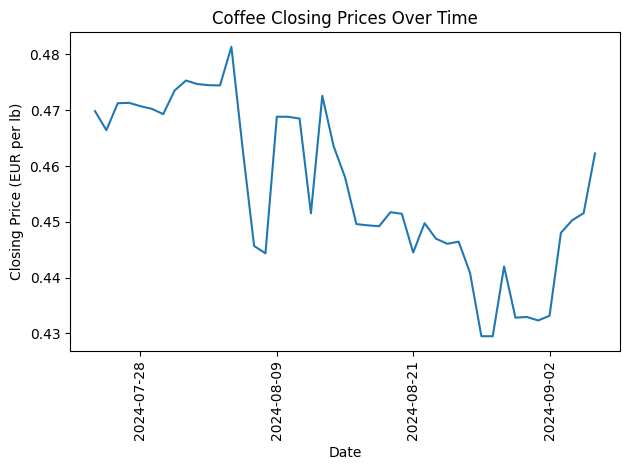

In [67]:
sns.lineplot(data=df_coffee, 
           x='date', 
           y='close')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Closing Price (EUR per lb)')

plt.title('Coffee Closing Prices Over Time') 


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.tight_layout()

# Showing the plot
plt.show()

#### Interactive Line Plot

In [68]:
import plotly.express as px
import plotly.io as pio

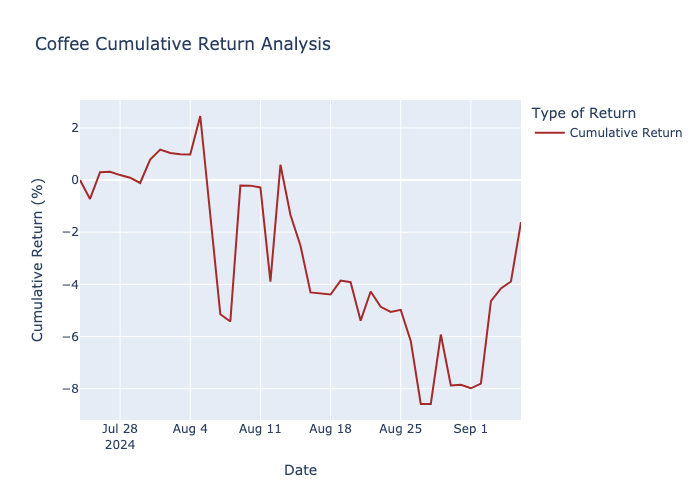

In [93]:
initial_price = df_coffee['close'].iloc[0]
df_coffee['cumulative_return_2'] = (df_coffee['close'] - initial_price) / initial_price
df_coffee['cumulative_return_2_'] = df_coffee['cumulative_return_2'] * 100

df_coffee['Return Type'] = 'Cumulative Return'

color_map = {
    'Cumulative Return': 'brown'
}

fig = px.line(
    df_coffee,
    x='date',
    y='cumulative_return_2_',
    color='Return Type',
    title='Coffee Cumulative Return Analysis',
    labels={
        'date': 'Date',
        'cumulative_return_2_': 'Cumulative Return (%)',
        'Return Type': 'Type of Return'
    },
    color_discrete_map=color_map
)

fig.show(renderer="png")

With .iloc[0], we select the first value, and then, for each day, we calculate the variation relative to the initial price. After that, we multiply by 100 to get the percentage change. The cumulative return tells us how much the price of coffee has changed in percentage terms compared to its initial price.

#### The following API call fetchs the different currency exchanges from :
https://rapidapi.com/principalapis/api/currency-conversion-and-exchange-rates/playground/apiendpoint_efffc9b9-e241-4eeb-84ae-c4c9aa3bbb35


In [70]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = ""

Each api call allows only to extract the date from one day from euro to multiple coins.
The following chunk of code will allow a for loop that takes each of the dates and saves the information on a data frame.

In [71]:
# Set the connection to the api
conn = http.client.HTTPSConnection("currency-conversion-and-exchange-rates.p.rapidapi.com")

# Set the header required for each API call
headers = {
    'x-rapidapi-key': "ddfde50cd1mshe28434f212e78bap142fa2jsn0423e3ebd2b4",
    'x-rapidapi-host': "currency-conversion-and-exchange-rates.p.rapidapi.com"
}

# Set a list of all of the dates that we want to check
l_dates = ["2024-07-24", "2024-07-25", "2024-07-26", "2024-07-27", "2024-07-28", "2024-07-29", "2024-07-30", "2024-07-31", "2024-08-01",
            "2024-08-02", "2024-08-03", "2024-08-04", "2024-08-05", "2024-08-06", "2024-08-07", "2024-08-08", "2024-08-09", "2024-08-10",
            "2024-08-11", "2024-08-12", "2024-08-13", "2024-08-14", "2024-08-15", "2024-08-16", "2024-08-17", "2024-08-18", "2024-08-19",
            "2024-08-20", "2024-08-21", "2024-08-22", "2024-08-23", "2024-08-24", "2024-08-25", "2024-08-26", "2024-08-27", "2024-08-28", 
            "2024-08-29", "2024-08-30", "2024-08-31", "2024-09-01", "2024-09-02", "2024-09-03", "2024-09-04", "2024-09-05", "2024-09-06", 
            "2024-09-07", "2024-09-08", "2024-09-09", "2024-09-10", "2024-09-11", "2024-09-12", "2024-09-13", "2024-09-14", "2024-09-15", 
            "2024-09-16", "2024-09-17", "2024-09-18", "2024-09-19", "2024-09-20", "2024-09-21", "2024-09-22", "2024-09-23", "2024-09-24", 
            "2024-09-25", "2024-09-26", "2024-09-27", "2024-09-28", "2024-09-29", "2024-09-30", "2024-10-01", "2024-10-02", "2024-10-03", 
            "2024-10-04", "2024-10-05", "2024-10-06", "2024-10-07", "2024-10-08", "2024-10-09", "2024-10-10", "2024-10-11", "2024-10-12", 
            "2024-10-13", "2024-10-14", "2024-10-15", "2024-10-16", "2024-10-17", "2024-10-18", "2024-10-19", "2024-10-20", "2024-10-21"]
df_full = pd.DataFrame()
for date_to_get in l_dates:
    conn.request("GET", "/"+date_to_get+"?from=EUR&to=COP%2CBRL", headers=headers)

    res = conn.getresponse()
    data = res.read()

    print(data.decode("utf-8"))
    dict_resp = json.loads(data.decode("utf-8"))
    exchange_rates = pd.DataFrame.from_dict(dict_resp)
    exchange_rates.reset_index(inplace=True)

    df_full = pd.concat([exchange_rates, df_full])

{"timestamp":1721865599,"base":"EUR","success":true,"rates":{"ANG":1.953921,"SVC":9.486133,"CAD":1.496984,"XCD":2.929323,"MVR":16.637792,"HRK":7.487603,"AUD":1.648609,"MWK":1881.139462,"XAG":0.037509,"MAD":10.729097,"PHP":63.497131,"NAD":19.889689,"GNF":9335.183272,"KES":144.159902,"MZN":69.261901,"BTN":90.752408,"MGA":4918.24963,"AZN":1.846275,"XAU":0.000452,"RON":4.970163,"CHF":0.959321,"EGP":52.391487,"BSD":1.084201,"TWD":35.476189,"GGP":0.835219,"LVL":0.655647,"MMK":3520.500542,"WST":3.038862,"ILS":3.955966,"BHD":0.408523,"GBP":0.840281,"TZS":2926.559475,"SDG":635.17136,"LAK":24042.229294,"DJF":192.632573,"BYN":3.548076,"LBP":97118.423082,"RWF":1425.342922,"PEN":4.073012,"EUR":1,"ZMK":9756.496712,"RSD":117.064569,"INR":90.770227,"MUR":50.650878,"BWP":14.710656,"GEL":2.953702,"KMF":492.339483,"UZS":13651.858749,"RUB":93.477634,"CUC":1.083911,"BGN":1.955657,"JOD":0.768169,"NGN":1717.186388,"BDT":127.388361,"PKR":301.871331,"BRL":6.129628,"KZT":513.853051,"CVE":110.699227,"HNL":26.864

In [72]:
# Export to CSV to guarantee the acces to the information later on
df_full.to_csv("currency_exch_gen.csv")

In [73]:
# Read CSV
df_full = pd.read_csv("currency_exch_gen.csv")

In [74]:
# As we reset the indexes we require the name of the column to represent the "representative market rate"
df_full.rename(columns={"index":"currency_abreviation"}, inplace=True)

In [75]:
# Select the coin tag that corresponds to the country that we require
df_country = df_full[df_full["currency_abreviation"] == 'COP']

In [76]:
# Reset the indexes and deleting the old index
df_country.reset_index(drop=True, inplace=True)

In [77]:
df_country.head()

,Unnamed: 0,currency_abreviation,timestamp,base,success,rates,date,historical
0,96,COP,1729555199,EUR,True,4627.082792,2024-10-21,True
1,96,COP,1729468799,EUR,True,4605.459678,2024-10-20,True
2,96,COP,1729382399,EUR,True,4608.344219,2024-10-19,True
3,96,COP,1729295999,EUR,True,4640.583907,2024-10-18,True
4,96,COP,1729209599,EUR,True,4605.334617,2024-10-17,True


As we fetched information from a csv we will drop the column that contains the unnamed. If you are testing the direct connection to the dataframe please SKIP the following step

In [78]:
df_country.drop(columns={"Unnamed: 0"}, inplace=True)

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/1367547266.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df_country.head()

,currency_abreviation,timestamp,base,success,rates,date,historical
0,COP,1729555199,EUR,True,4627.082792,2024-10-21,True
1,COP,1729468799,EUR,True,4605.459678,2024-10-20,True
2,COP,1729382399,EUR,True,4608.344219,2024-10-19,True
3,COP,1729295999,EUR,True,4640.583907,2024-10-18,True
4,COP,1729209599,EUR,True,4605.334617,2024-10-17,True


In [80]:
# find the type of data on each column.
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   currency_abreviation  90 non-null     object 
 1   timestamp             90 non-null     int64  
 2   base                  90 non-null     object 
 3   success               90 non-null     bool   
 4   rates                 90 non-null     float64
 5   date                  90 non-null     object 
 6   historical            90 non-null     bool   
dtypes: bool(2), float64(1), int64(1), object(3)
memory usage: 3.8+ KB


We can obbserve there are no missing values

In [81]:
# Change date from object to date
df_country['date'] = pd.to_datetime(df_country['date'])

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/410872753.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



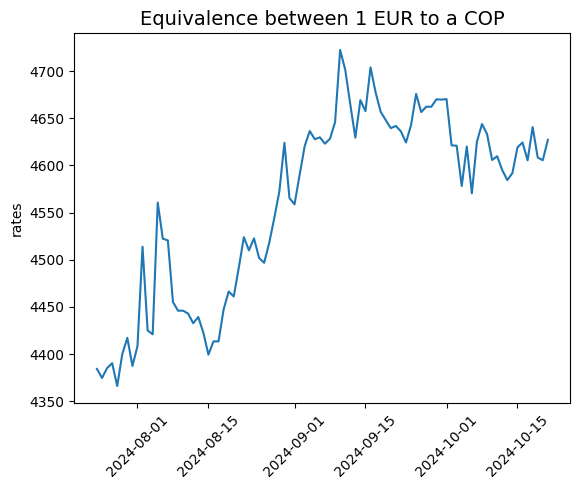

In [82]:
# Creating the line plot
sns.lineplot(x='date', y='rates', data=df_country)
plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Equivalence between 1 EUR to a COP", fontsize = 14)
plt.show()

We expect our boutique coffe production will be arround 10000 lb of coffee per month
We allso expect the median price to be our reference price. Based on the previous information we obtain

In [83]:
# Get the month of each of the dates on the data frame to a new col named month
df_country['month'] = df_country['date'].dt.month

# Group by the 'month' and calculate the mean of the 'rates' column
# This will allow to geat the mean value per month of each of the exchange rate equivalences
df_country_monthly_mean = df_country.groupby('month')['rates'].mean().reset_index()

# Rename the columns
df_country_monthly_mean.columns = ['month', 'mean_rate_exchange_COP']

/var/folders/8t/r7ypz9012fs80_3rzqlv2x8r0000gn/T/ipykernel_67028/3896773465.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
df_country_monthly_mean

,month,mean_rate_exchange_COP
0,7,4388.093795
1,8,4481.501518
2,9,4649.043383
3,10,4614.280424


In [85]:
# set values to our monthly price and amount produced
df_country_monthly_mean['price_per_lb_EUR'] = 0.60
df_country_monthly_mean['number_of_lb_produced_by_month'] = 10000

In [86]:
df_country_monthly_mean

,month,mean_rate_exchange_COP,price_per_lb_EUR,number_of_lb_produced_by_month
0,7,4388.093795,0.6,10000
1,8,4481.501518,0.6,10000
2,9,4649.043383,0.6,10000
3,10,4614.280424,0.6,10000


In [87]:
# Calculation on the estimated gross revenue
df_country_monthly_mean['gross_revenue'] = df_country_monthly_mean["number_of_lb_produced_by_month"] * df_country_monthly_mean["price_per_lb_EUR"] * df_country_monthly_mean["mean_rate_exchange_COP"]

In [88]:
# Fixing the format to get the number to be shown fully on a table print
df_country_monthly_mean["gross_revenue"] = df_country_monthly_mean["gross_revenue"].apply(lambda x: '{:.0f}'.format(x))

In [89]:
df_country_monthly_mean["gross_revenue"] = df_country_monthly_mean["gross_revenue"].astype(float)

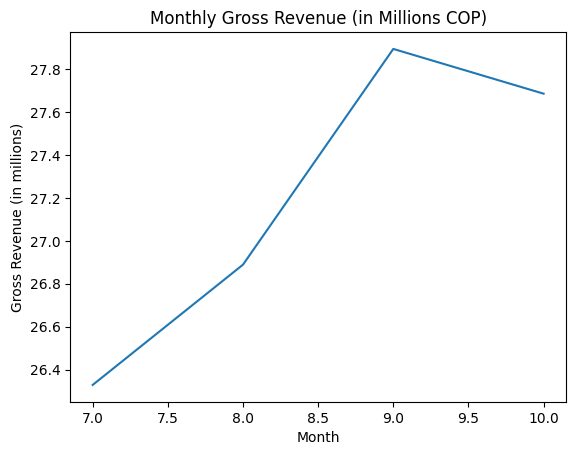

In [90]:
df_country_monthly_mean['gross_revenue_millions'] = df_country_monthly_mean['gross_revenue'] / 1_000_000

# Plotting the data with Seaborn
sns.lineplot(x='month', y='gross_revenue_millions', data=df_country_monthly_mean)

# Labeling the axes
plt.xlabel('Month')
plt.ylabel('Gross Revenue (in millions)')
plt.title('Monthly Gross Revenue (in Millions COP)')

# Show the plot
plt.show()

In [91]:
df_country_monthly_mean

,month,mean_rate_exchange_COP,price_per_lb_EUR,number_of_lb_produced_by_month,gross_revenue,gross_revenue_millions
0,7,4388.093795,0.6,10000,26328563.0,26.328563
1,8,4481.501518,0.6,10000,26889009.0,26.889009
2,9,4649.043383,0.6,10000,27894260.0,27.894260
3,10,4614.280424,0.6,10000,27685683.0,27.685683
